In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("~/Desktop/SUB-EST2020_ALL.csv",
                   delimiter=',', encoding='ISO-8859-1')

In [2]:
data.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'PLACE', 'COUSUB', 'CONCIT',
       'PRIMGEO_FLAG', 'FUNCSTAT', 'NAME', 'STNAME', 'CENSUS2010POP',
       'ESTIMATESBASE2010', 'POPESTIMATE2010', 'POPESTIMATE2011',
       'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014',
       'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017',
       'POPESTIMATE2018', 'POPESTIMATE2019', 'POPESTIMATE042020',
       'POPESTIMATE2020'],
      dtype='object')

In [3]:
data.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,...,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE042020,POPESTIMATE2020
0,40,1,0,0,0,0,0,A,Alabama,Alabama,...,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4920706,4921532
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,...,2645,2629,2610,2602,2587,2578,2565,2555,2555,2553
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,...,4453,4430,4399,4371,4335,4304,4285,4254,4224,4211
3,162,1,0,484,0,0,0,A,Addison town,Alabama,...,745,744,742,734,734,728,725,723,719,717
4,162,1,0,676,0,0,0,A,Akron town,Alabama,...,347,344,338,338,335,332,332,328,328,327


In [43]:
state_data = data[data['SUMLEV'] == 40].sort_values(by="POPESTIMATE2020")

In [76]:
state_data['CENSUS2010POP'] = state_data['CENSUS2010POP'].astype('int')


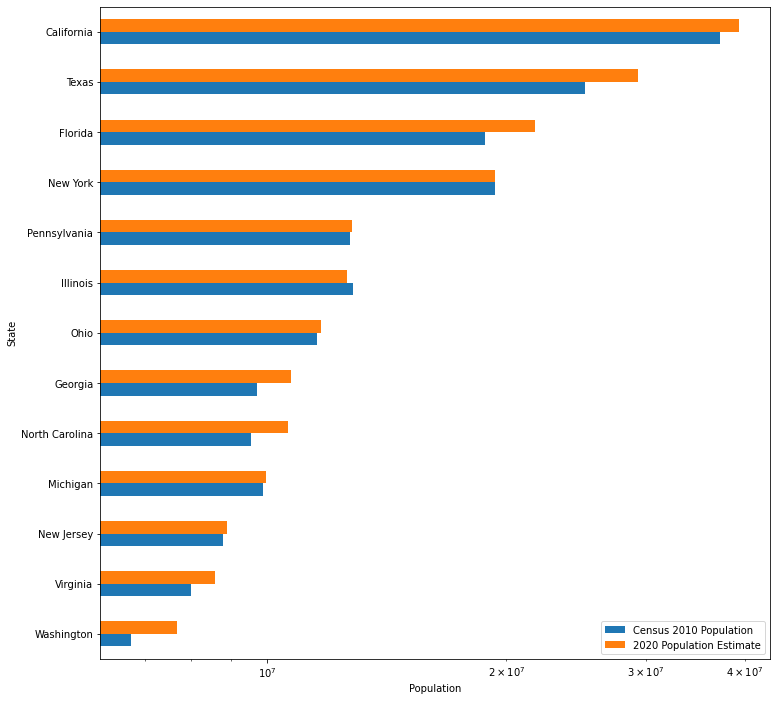

In [84]:
state_data.tail(13).plot(kind='barh',
                x='STNAME', y=['CENSUS2010POP', 'POPESTIMATE2020'],
                label=['Census 2010 Population', '2020 Population Estimate'],
                figsize=(12, 12), xlabel='State')
plt.gca().set_xlabel('Population')
plt.xscale('log')

<AxesSubplot:xlabel='POPESTIMATE2020', ylabel='CENSUS2010POP'>

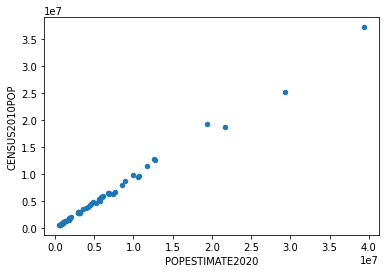

In [86]:
state_data.plot.scatter(x='POPESTIMATE2020', y='CENSUS2010POP')

<AxesSubplot:ylabel='STNAME'>

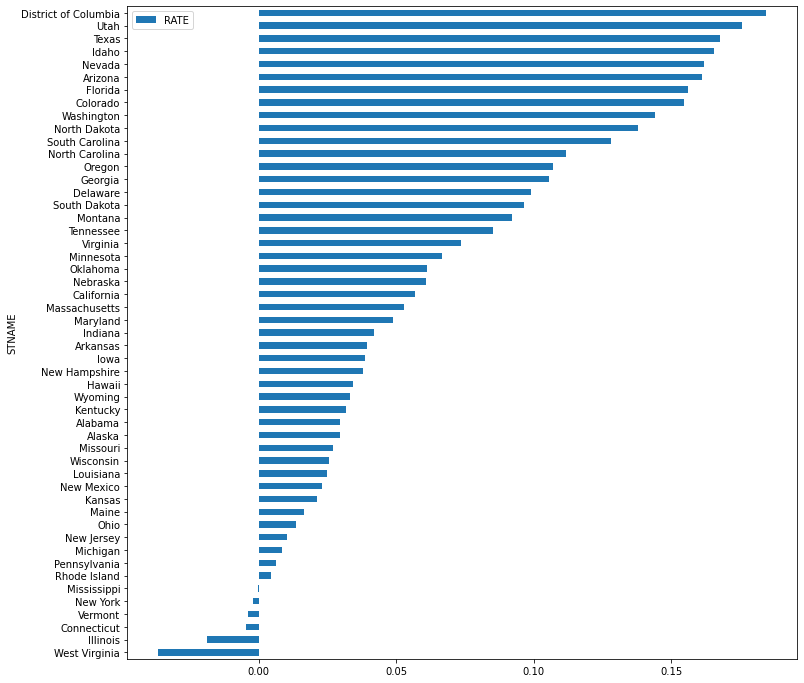

In [112]:
rate = (state_data['POPESTIMATE2020'] -
        state_data['CENSUS2010POP']) / state_data['CENSUS2010POP']
state_data['RATE'] = rate

state_data.sort_values(by='RATE').plot(
  kind='barh',
  x='STNAME', y='RATE',
  figsize=(12, 12)
)

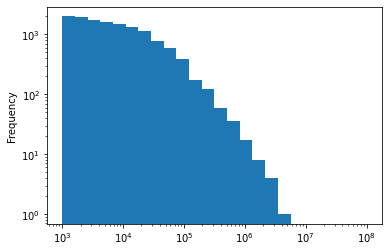

In [111]:
data[data['SUMLEV'] == 157]['POPESTIMATE2020'].plot.hist(bins=np.logspace(3, 8, 25))
plt.xscale('log')
plt.yscale('log')

#### (# of cities/towns) $\propto$ (population)${}^{-\alpha}$

In [ ]:
count, bins = np.histogram(data[data['SUMLEV'] == 157]['POPESTIMATE2020'], bins=np.logspace(3, 8, 25))

-1.483863795194714


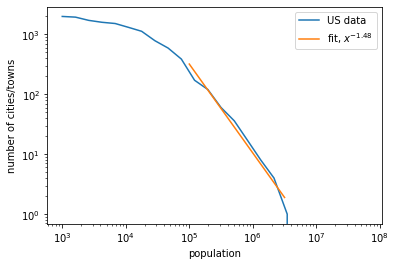

In [ ]:
x = bins[:-1]
y = count

plt.plot(x, y, label='US data')
plt.xscale('log')
plt.yscale('log')

mask = (x > 1e5) & (y != 0)
coeffs = np.polyfit(np.log(x[mask]), np.log(y[mask]), 1)

x_new = np.logspace(5, 6.5, 100)
y_new = np.exp(coeffs[1]) * x_new**coeffs[0]

print (coeffs[0])

plt.plot(x_new, y_new, label=f'fit, $x^{{{coeffs[0]:.2f}}}$')

plt.xlabel('population')
plt.ylabel('number of cities/towns')
plt.legend()